__Лабораторная работа 4. Методы стохастической оптимизации. Настройка гиперпараметров.__

__Выполнили: Новицкий Илья, Остриченко Илья, Петров Георгий M3234__

__Метод отжига.__

__Теоретическая часть.__


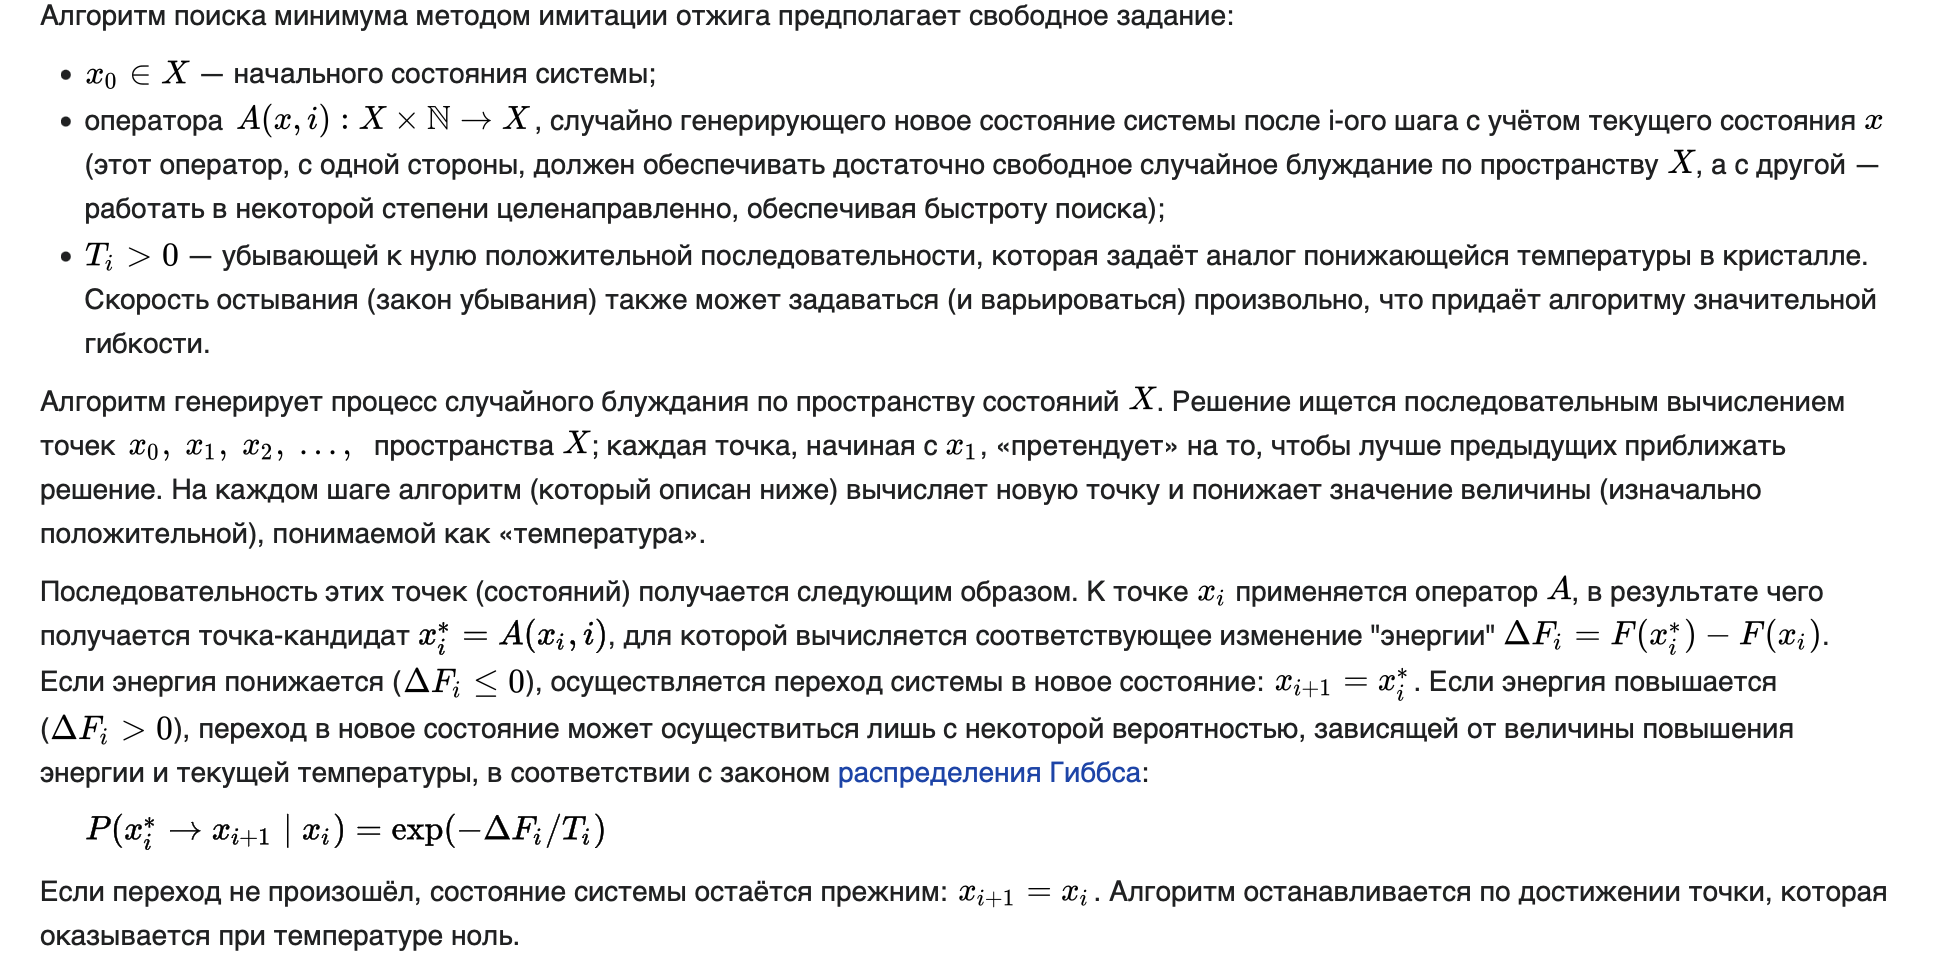

__Практическая часть.__

COOLING SCHEDULE: linear


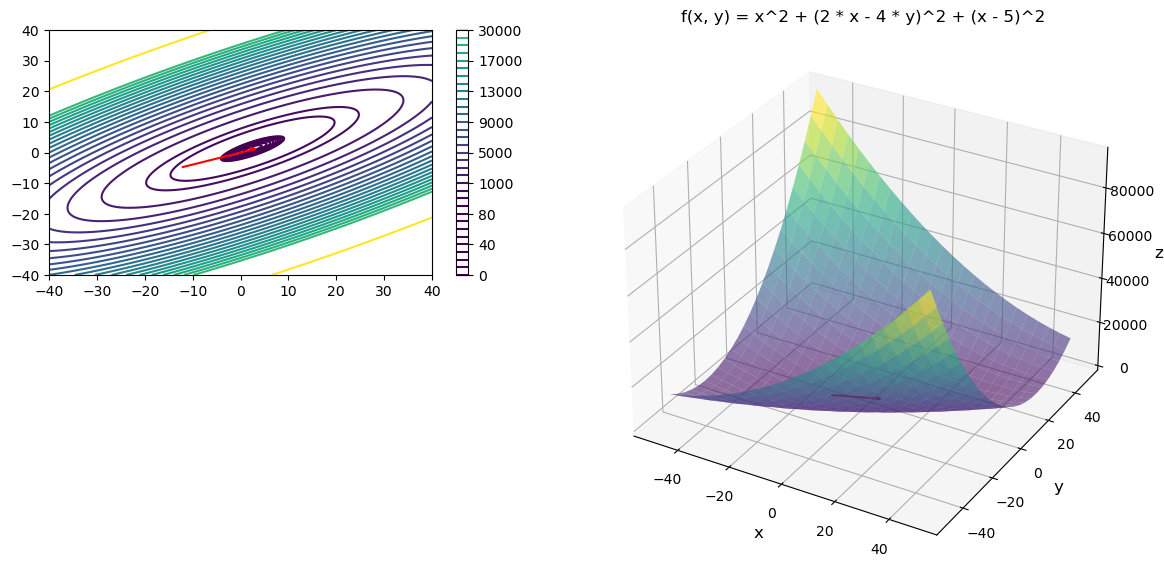

Optimal solution: [ 2.72116376  1.313596   69.6507422 ]
Optimal value: 12.633149571431996
Expected oprimal value: 12.5
Call counter: 20004
----------------------------------------------------------------------
Optimal solution: [ 2.41153983  1.18937351 70.        ]
Optimal value: 12.519951876297613
Expected oprimal value: 12.5
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [ 2.63014663  1.3161642  17.89485015]
Optimal value: 12.533895329958433
Expected oprimal value: 12.5
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [ 2.41907419  1.23145669 42.77823823]
Optimal value: 12.520785469675534
Expected oprimal value: 12.5
Call counter: 20002
----------------------------------------------------------------------


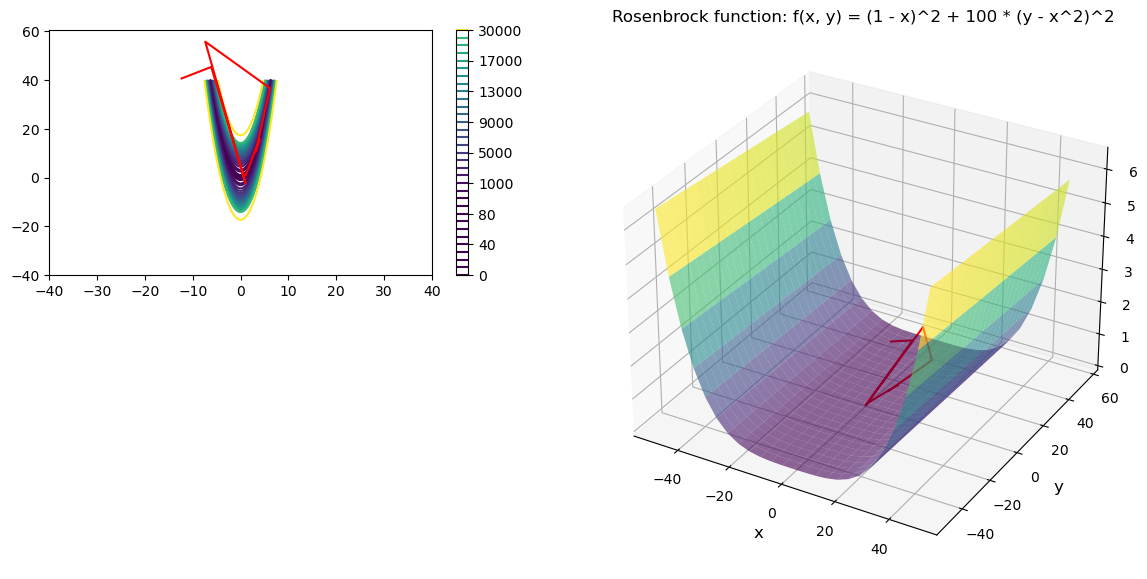

Optimal solution: [  0.84970101   0.70198132 -31.95816417]
Optimal value: 0.06263175473081697
Expected oprimal value: 0
Call counter: 20004
----------------------------------------------------------------------
Optimal solution: [  1.36134769   1.86061601 -57.73553948]
Optimal value: 0.1359721736811682
Expected oprimal value: 0
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [ 0.93171715  0.84155371 66.97897606]
Optimal value: 0.07511640273444888
Expected oprimal value: 0
Call counter: 20002
----------------------------------------------------------------------
Optimal solution: [  1.24077549   1.55920502 -63.5350308 ]
Optimal value: 0.09670778124802834
Expected oprimal value: 0
Call counter: 20002
----------------------------------------------------------------------
COOLING SCHEDULE: exponential


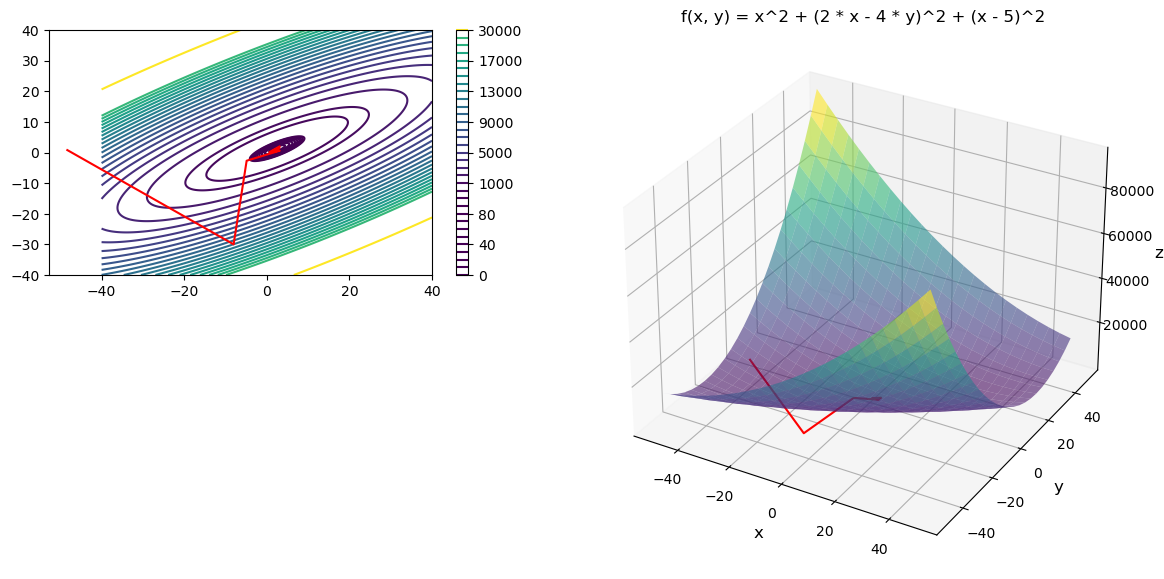

Optimal solution: [ 2.50095423  1.24928539 53.74958388]
Optimal value: 12.50002454467295
Expected oprimal value: 12.5
Call counter: 66004
----------------------------------------------------------------------
Optimal solution: [ 2.49972276  1.25052679 51.3769569 ]
Optimal value: 12.500007238017226
Expected oprimal value: 12.5
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [ 2.50197235  1.25028276 63.27746036]
Optimal value: 12.500015697062361
Expected oprimal value: 12.5
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [ 2.50004871  1.25039775 64.71540617]
Optimal value: 12.500002235568294
Expected oprimal value: 12.5
Call counter: 66002
----------------------------------------------------------------------


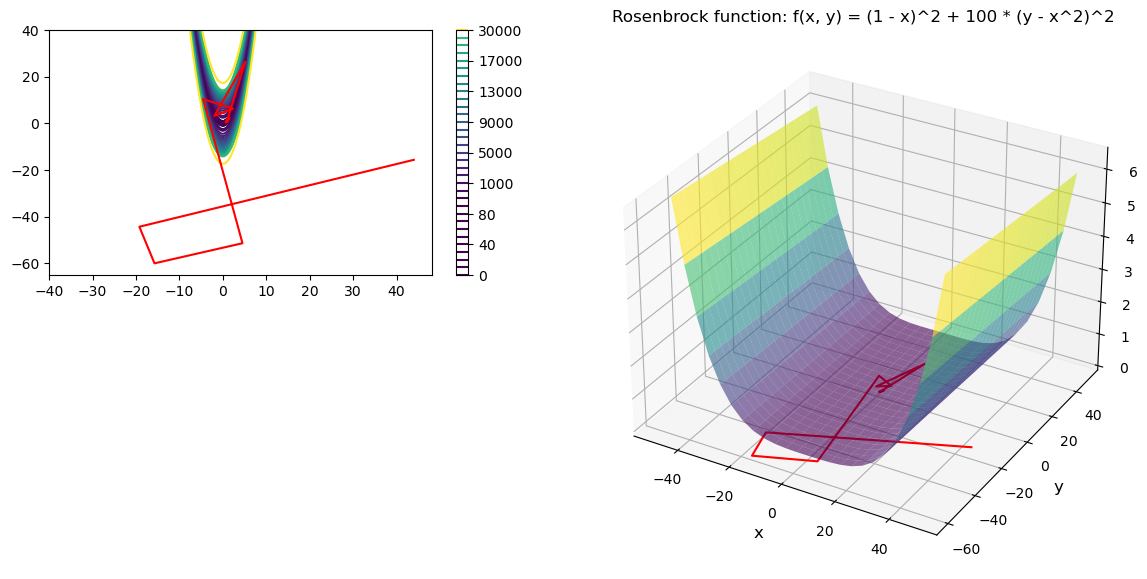

Optimal solution: [ 1.00327946  1.00646328 59.6089756 ]
Optimal value: 1.1887134670106433e-05
Expected oprimal value: 0
Call counter: 66004
----------------------------------------------------------------------
Optimal solution: [ 0.9984897   0.99711253 68.71804114]
Optimal value: 3.993174627663246e-06
Expected oprimal value: 0
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [ 1.00361646  1.00700161 65.29294528]
Optimal value: 1.9051122498442906e-05
Expected oprimal value: 0
Call counter: 66002
----------------------------------------------------------------------
Optimal solution: [  1.00368048   1.00753544 -44.2277644 ]
Optimal value: 1.6135905985642977e-05
Expected oprimal value: 0
Call counter: 66002
----------------------------------------------------------------------


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def count_calls(func):
    def wrapper(*args, **kwargs):
        wrapper.calls += 1
        return func(*args, **kwargs)

    wrapper.calls = 0
    return wrapper

@count_calls
def function1(values):
    function1.name = 'f(x, y) = x^2 + (2 * x - 4 * y)^2 + (x - 5)^2'
    function1.minimum = 12.5
    x = values[0]
    y = values[1]
    return x ** 2 + (2 * x - 4 * y) ** 2 + (x - 5) ** 2

@count_calls
def function2(values):
    function2.name = 'Rosenbrock function: f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2'
    function2.minimum = 0
    x = values[0]
    y = values[1]
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2


def visualize(function, points):
    x = np.linspace(-50, 50, 25)
    y = np.linspace(-50, 50, 25)

    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])

    fig = plt.figure(figsize=(21, 7))
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

    ax.set_title(function.name, fontsize=12)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_zlabel('z', fontsize=12)

    ax.plot(points[:, 0], points[:, 1], points[:, 2], color='red', label='Annealing')

    ax_contur = fig.add_subplot(231)
    X_contur = np.linspace(-40, 40, 1000)
    Y_contur = np.linspace(-40, 40, 1000)
    X_contur, Y_contur = np.meshgrid(X_contur, Y_contur)
    Z_contur = function([X_contur, Y_contur])
    arr1 = np.arange(0, 100, 10)
    arr2 = np.arange(100, 1000, 500)
    arr3 = np.arange(1000, 20000, 1000)
    arr4 = np.arange(20000, 40000, 10000)
    combined_arr1 = np.concatenate((arr1, arr2))
    combined_arr2 = np.concatenate((arr3, arr4))
    combined_arr3 = np.concatenate((combined_arr1, combined_arr2))
    cp = ax_contur.contour(X_contur, Y_contur, Z_contur, levels=combined_arr3)
    ax_contur.plot(points[:, 0], points[:, 1], color='red')
    plt.colorbar(cp)

    plt.show()
    

def simulated_annealing(function, bounds, visualization = True, cooling_schedule = 'linear'):
    max_temperature = 1
    min_temperature = 0.001
    
    cooling_exp_rate = 0.9
    cooling_linear_rate = 0.05
    
    num_iterations = 1000
    
    current_solution = np.random.uniform(bounds[:, 0], bounds[:, 1])
    current_value = function(current_solution)
    best_solution = current_solution
    best_value = current_value
    current_temperature = max_temperature
    points = [current_solution]
    lb = min(bounds[:, 0])
    ub = max(bounds[:, 1])
    
    while current_temperature > min_temperature:
        for i in range(num_iterations):
            candidate_solution = current_solution + np.random.uniform(lb, ub, len(bounds)) * current_temperature
            candidate_solution = np.clip(candidate_solution, bounds[:, 0], bounds[:, 1])
            candidate_value = function(candidate_solution)

            if candidate_value < current_value or np.random.uniform() < np.exp((current_value - candidate_value) / current_temperature):
                current_solution = candidate_solution
                current_value = candidate_value
                points.append(current_solution)

            if current_value < best_value:
                best_solution = current_solution
                best_value = current_value

        if cooling_schedule == 'linear':
            current_temperature -= cooling_linear_rate * max_temperature
            
        if cooling_schedule == 'exponential':
            current_temperature *= cooling_exp_rate
    
    if visualization:
        visualize(function, np.array(points))
        
    return best_solution

bounds = np.array([(-50, 50), (-60, 60), (-70, 70)])
tests_number = 5

for schedule in ['linear', 'exponential']:
    print('COOLING SCHEDULE: ' + schedule)
    for func in [function1, function2]:
        first_test = True
        for i in range(1, tests_number):
            result = simulated_annealing(func, bounds, first_test, schedule)
            first_test = False
            print("Optimal solution:", result)
            print("Optimal value:", func(result))
            print("Expected oprimal value:", func.minimum)
            print("Call counter:", func.calls)
            print("-"*70)
            func.calls = 0



# __Библиотечный метод отжига__

In [4]:
from scipy.optimize import basinhopping

initial_values = [100, 200, 300]

result = basinhopping(function2, initial_values, minimizer_kwargs={"bounds": bounds})

print("Optimal solution:", result.x)
print("Optimal value:", result.fun)
print("Function called:", function2.calls)
function2.calls = 0

Optimal solution: [ 0.99999974  0.99999944 69.61267847]
Optimal value: 2.7971030609495534e-13
Function called: 9188


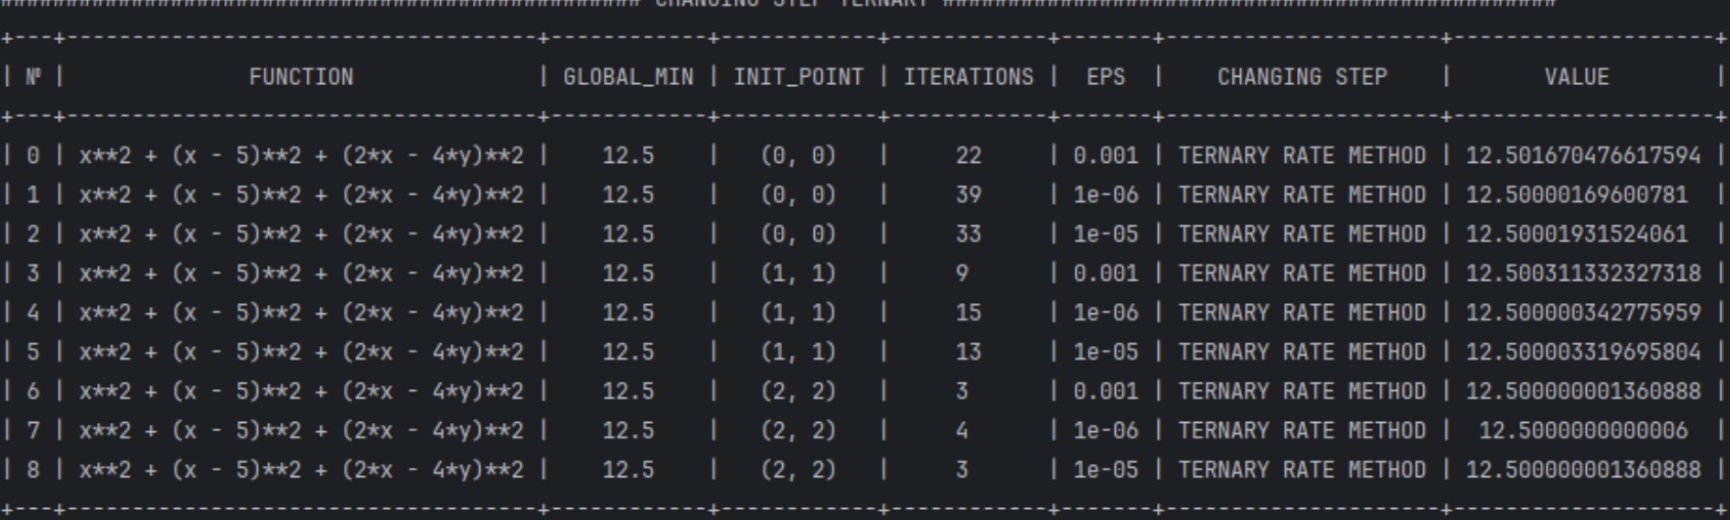

![function1 ternary newton](./images/func1_ternary_newton.png)

![function1 const newton](./images/func1_const_newton.png)

![function1 ternary newton](./images/func2_ternary_newton.png)

![function1 ternary newton](./images/func2_lib_newton.png)

__Подбор параметров:__

Показатель _cooling rate_ сильно сказывается на времени работы метода, поэтому, подбор правильного _cooling schedule_ позволяет ускорить работу программы в разы. Например, для унимодальных функций можно выбрать _exponential cooling rate_,  при котором значение температуры будет подбираться следующим образом: T(k + 1) = a * T(k). Если функция наооборот мультимодальная, _exponential cooling rate_ нам не подойдет(приведет к потери точности, возможно ошибочным результатам), поэтому можно использовать _linear cooling rate_: T(k + 1) = T(k) - a

Также, имея информацию о функции мы можем изменять пороговое значение температуры (критерий остановки), для экономии вычислительных ресурсов.

На эту тему есть отдельные исследования:

Yaghout Nourani and Bjarne Andresen, A comparison of simulated annealing cooling strategies (Journal of Physics A: Mathematical and General Volume 31, Number 41. October 16, 1998) 

![temperature dependency](./images/Temperature%20dependecy.png)

#### __Вывод:__

Метод иммитации отжига - ресурсоемкий, но очень полезный метод для решения задач оптимизации.

Преимущества:
1. Позволяет решать задачу минимизации для мультимодальных функций
2. Благодаря правильной настройке может довольно эффективно работать
3. Не зависит от начальной точки
4. Не требует вычисления производных

Недостатки:
1. Требует точной настройки (подбора параметров)
2. Для унимодальных функций работает сильно медленне, чем ранее изученные методы, основанные на наискорейшем спуске